In [45]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  datasets, model_selection, linear_model, metrics, preprocessing
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
%matplotlib inline

In [6]:
# Data loading
diabetes_data = datasets.load_diabetes(as_frame=True)
# print(diabetes_data.head)
diabetes_data.data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
df = diabetes_data.frame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
437    False
438    False
439    False
440    False
441    False
Length: 442, dtype: bool


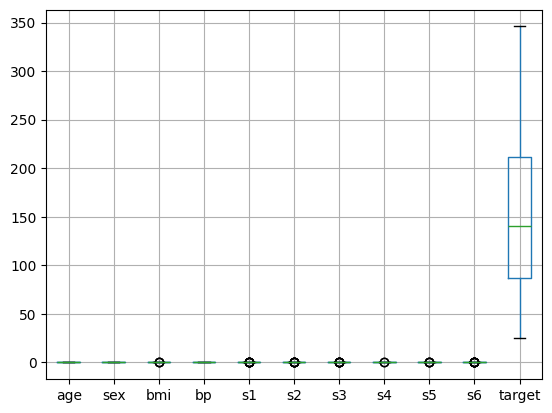

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


In [13]:
# 2. Data cleaning EDA

# 3. Data Cleaning
"""
Note: should check whether your data actually needs cleaning or not.
ypically check to do are checking for missing values and checking for duplicates.
"""
print(df.isna().sum())
print(df.duplicated())
df.boxplot()
plt.show()

# Split the data into features and labels
label = df.pop("target")
print(df.info())
print(label.head())
# 4. Data splitting


# 5. Feature scaling 


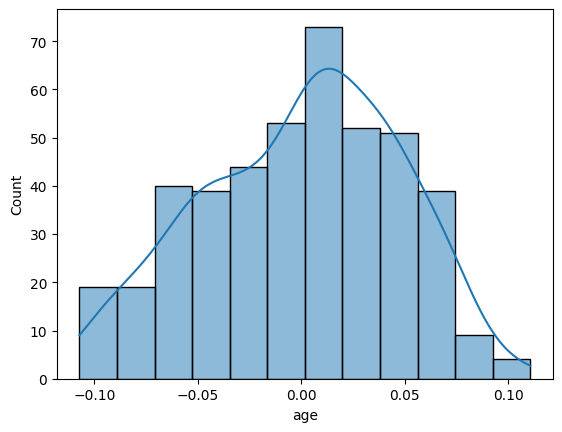

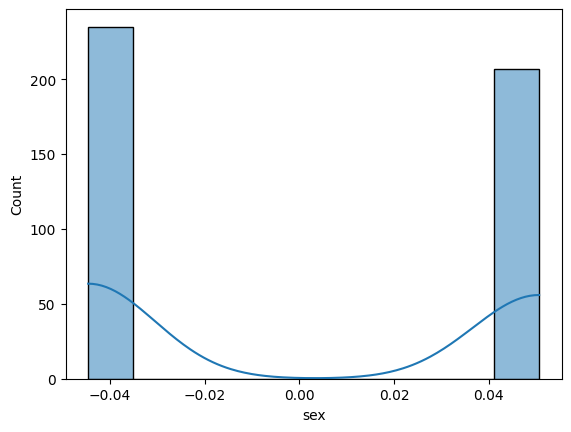

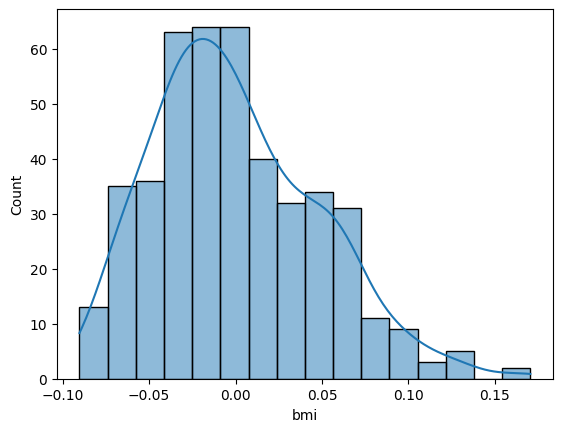

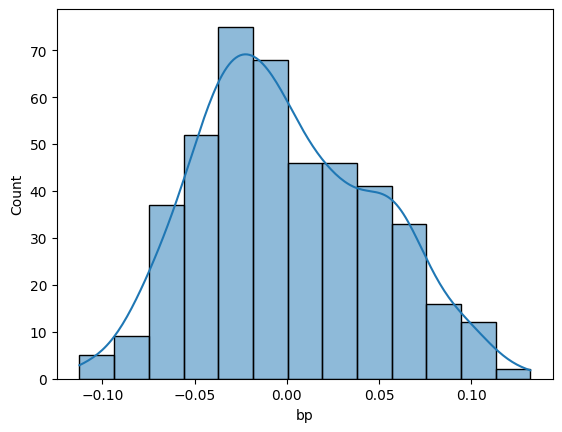

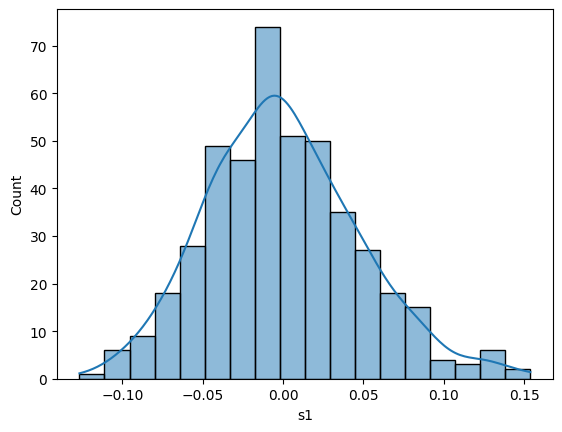

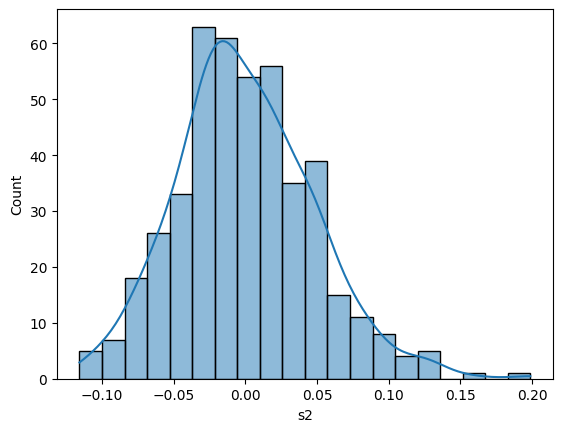

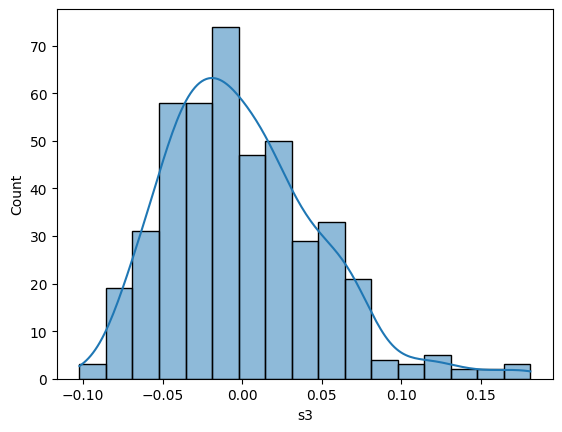

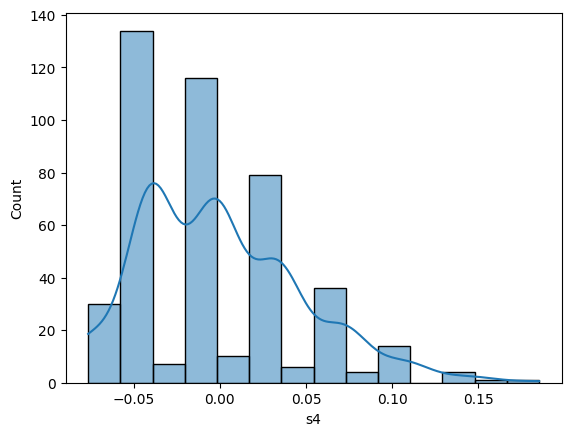

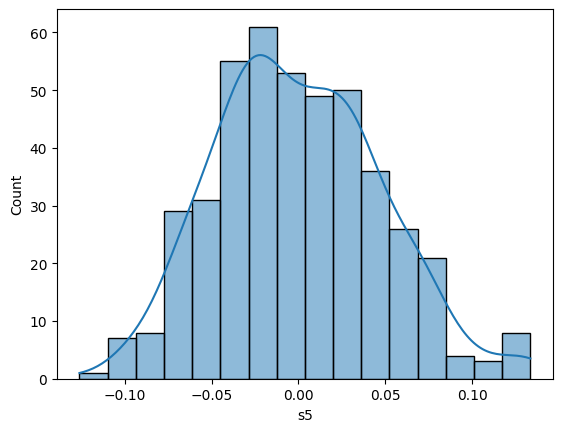

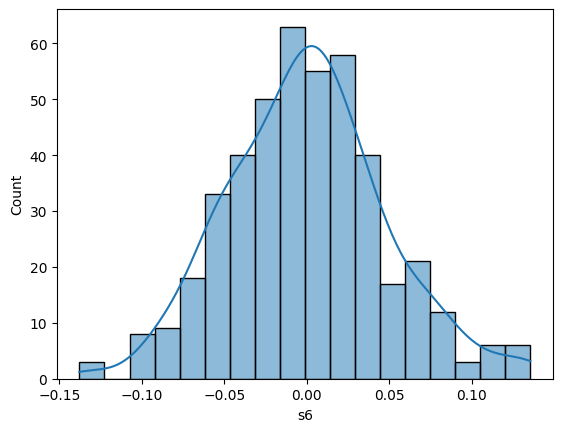

In [14]:
# Plot the distribution of the features
for x in df.columns:
    sns.histplot(df[x], kde=True)
    plt.show()

In [20]:
np.unique(df['sex'].values)
# 4. Data splitting
x_train, x_test, y_train, y_test = model_selection.train_test_split(df, label, train_size=0.7, random_state=42)

"""
At this point your data is ready to be used for the the model development
"""

'\nAt this point your data is ready to be used for the the model development\n'

In [28]:
# 5. Model development
# (A) Define the LinarREgression model using a variable

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
# (B) Traing the model using the .fit() method

regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

# (C) Use the test dta to perform prediction using the .predict()
diabetes_y_pred = regr.predict(diabetes_X_test)

In [31]:
# 5. Model development
# (A) Define the LinarREgression model using a variable
lr = LinearRegression()

# (B) Traing the model using the .fit() method
lr.fit(x_train, y_train)

# (C) Use the test dta to perform prediction using the .predict()
predictions = lr.predict(x_test)
print(predictions)

[138.46970031 181.10052342 125.34400904 292.75977277 123.8830531
  91.89830434 257.26463123 177.76169318  84.98549706 109.15960992
  94.4855284  166.13235108  57.40742502 206.13897354  97.7811842
 131.00472765 214.29789972 252.52907661 199.66656381 219.49985634
 203.23671317  88.00656925  70.65108459 186.92233427 155.81266751
 162.81022205 191.93135706 184.72924276  46.62920829 108.26566599
 178.14743952  91.35065005 127.72125745 184.04205666 172.23799897
 189.51548863 121.83265708 117.75339206 145.67950306  58.57563401
  72.55421321 107.27571105 166.15280313 153.29339984 165.19282154
  62.95752038  73.58909449 110.05656189  54.49723354 164.88920632
 152.49472803  63.8874565  111.4354561  108.34936269 179.96973311
 158.70054112  95.04833555 209.68990406 118.37356519  69.69946093
 189.04680627 204.99138626 140.26840176 105.75963198 131.22316354
 201.65649349 173.60251683 164.25810664 122.01567481 143.53425629
 179.42286037 201.32086534 234.50804093 146.96093984  80.27567403
 160.8682217

In [33]:
# 6. Perform model evaluation
# (A) Mean Squaared error
mse = metrics.mean_squared_error(y_test, predictions)
# (B) mean absoulte error
mae = metrics.mean_absolute_error(y_test, predictions)
# (C) Mean absolute presentage error 
mape = metrics.mean_absolute_percentage_error(y_test, predictions)
# (D) R2 value
r2 = metrics.r2_score(y_test, predictions)

print("Mean squarred error:", mse)
print("Mean absolute error:", mae)
print("Mean absolute persentage error:", mape)
print("R2 error:", r2)


Mean squarred error: 2821.7509810013107
Mean absolute error: 41.91937845679274
Mean absolute persentage error: 0.3667196318312674
R2 error: 0.4772897164322617


In [36]:
# Inspect the weights of the linear regression model
print(lr.coef_)
print(len(lr.coef_))
print(lr.intercept_)

[  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]
10
151.00821291456543


In [48]:
# Try different model
sdg = SGDRegressor(max_iter=10000);
sdg.fit(x_train, y_train)
predictions = sdg.predict(x_test)
print(predictions)

[144.97704187 174.93184714 139.56781916 283.60467983 129.41242865
 103.26057952 247.09098371 190.81385254  89.27779082 119.64755934
  98.37394124 148.69958531  68.53526045 208.68053654 108.31731292
 136.48316198 219.24908632 245.5226107  190.61333055 212.24987792
 191.44959967  92.72373349  79.27184322 186.9471687  151.51047255
 167.43765417 188.15369683 178.16025911  53.25594576 122.05271887
 180.73358859  98.56331986 133.15605918 181.96139962 173.28875502
 187.10697877 128.93777168 127.53402815 156.42054948  64.14196117
  86.1256648  115.4580422  157.97493201 157.66684628 167.09892988
  69.44743143  85.37842339 102.51449013  65.96725475 149.26261128
 148.57227023  67.72350741 126.02997042 110.50329518 173.32787856
 152.90963969 102.45423264 199.07650279 113.25604595  65.61560118
 182.87924615 189.19790441 140.54020932 115.87835882 127.41900178
 192.42953108 170.95602833 159.63341282 107.70330332 140.38882559
 174.19396415 197.13120757 236.644856   142.5710362   85.56469986
 156.02889

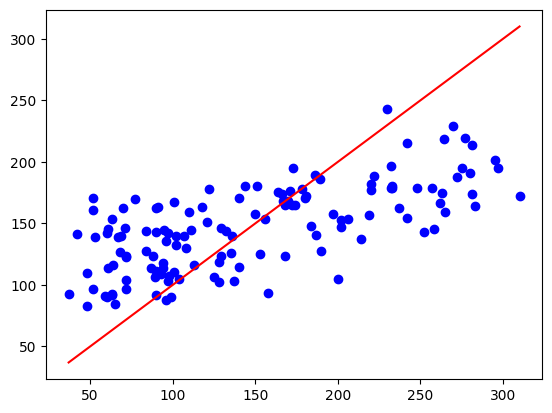

In [70]:
fig, ax = plt.subplots()
plt.scatter(y_test, predictions, color='blue', label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)] , color='red', label='Regression line')
# ax.plot(x_test, predictions)
plt.show()

In [49]:
mse = metrics.mean_squared_error(y_test, predictions)
# (B) mean absoulte error
mae = metrics.mean_absolute_error(y_test, predictions)
# (C) Mean absolute presentage error 
mape = metrics.mean_absolute_percentage_error(y_test, predictions)
# (D) R2 value
r2 = metrics.r2_score(y_test, predictions)

print("Mean squarred error:", mse)
print("Mean absolute error:", mae)
print("Mean absolute persentage error:", mape)
print("R2 error:", r2)


Mean squarred error: 2810.31946123192
Mean absolute error: 41.912208362526506
Mean absolute persentage error: 0.3654975092909481
R2 error: 0.479407328149419


In [50]:
rigde = Ridge()
rigde.fit(x_train, y_train)
predictions = rigde.predict(x_test)

mse = metrics.mean_squared_error(y_test, predictions)
# (B) mean absoulte error
mae = metrics.mean_absolute_error(y_test, predictions)
# (C) Mean absolute presentage error 
mape = metrics.mean_absolute_percentage_error(y_test, predictions)
# (D) R2 value
r2 = metrics.r2_score(y_test, predictions)

print("Mean squarred error:", mse)
print("Mean absolute error:", mae)
print("Mean absolute persentage error:", mape)
print("R2 error:", r2)



Mean squarred error: 3112.9664151980814
Mean absolute error: 45.46352769933713
Mean absolute persentage error: 0.41313226132693703
R2 error: 0.4233440269603015


In [51]:
print(rigde.coef_)
print(sdg.coef_)

[  45.05421022  -71.94739737  280.71625182  195.21266175   -2.22930269
  -17.54079744 -148.68886188  120.46723979  198.61440137  106.93469215]
[  47.39387464 -176.39038874  475.30927851  320.80320508  -59.58303135
  -85.1672033  -225.02780172  151.05597489  307.23899447  123.94916848]
